<a href="https://colab.research.google.com/github/naitotomoyuki/FromZero2DeepLearning/blob/main/KerasChp5DeepLearning4ComputerVision4googlecorab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 コンピュータビジョンのためのディープラーニング
## 5.1 畳み込みニューラルネットワークの紹介

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1946330255658690909, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12784419214229430917
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') /255

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.4008 - accuracy: 0.8698
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0524 - accuracy: 0.9841
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0316 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0195 - accuracy: 0.9936


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 0.9914


### 5.1.1 畳み込み演算
CNNがDenseに比べて優れている訳<br>
・CNNが学習するパタンは移動普遍である<br>
・CNNはパターンの空間階層を学習できる<br>
・ストライドされた畳み込み積分はあまり使われないがたまに役に立つ<br>


### 5.1.2 Maxプーリング
Maxプーリングをいれずにかなり大きな特徴マップを維持するとどうなるか？<br>

In [11]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (28, 28, 1)))
model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(10, activation = 'softmax'))

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1982528   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 2,038,922
Trainable params: 2,038,922
Non-trainable params: 0
____________________________________________

In [13]:
model2.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
model2.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2995 - accuracy: 0.9109
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0401 - accuracy: 0.9879
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0268 - accuracy: 0.9927
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0187 - accuracy: 0.9948
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0131 - accuracy: 0.9963


In [15]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0589 - accuracy: 0.9861


<b>特徴量の空間階層の学習に貢献しない</b><br>
<b>最終的な特徴マップが非常に大きい</b><br>
$22 \times 22  \times 64 = 30,976$このパラメータをサイズ512のDense層に合わせて平坦化した場合パラメータ数は1580万になる！<br>
こんな浅い小さなモデルにパラメータが多すぎて過学習になる。<br>

## 5.2 小さなデータセットでCNNを一から訓練する

### 5.2.1 小さなデータセットとディープラーニング
モデルが小さく、良く正規化されていて、タスクが単純であれば小さなデータセットでもうまくいくときがある。<br>

### 5.2.2 データのダウンロード
Dogs vs. Cats Kaggle2013から<br>
https://www.kaggle.com/c/dogs-vs-cats/data<br>
訓練データ、検証データ、テストデータセットをそれぞれ1000個, 500個、500個のサンプルで作る。


In [16]:
import os, shutil

original_dataset_dir = './dogs-vs-cats/train'

#小さなデータセットを格納するディレクトリ
base_dir = '/content/drive/MyDrive/GoogleColaboratory/Python_Keras_DeepLearning/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [17]:
#訓練データセット、検証データセット、テストデータセットを配置するディレクトリ
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [18]:
#訓練用のネコ画像を配置するディレクトリ
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

#訓練用の犬画像を配置するディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

#検証用のネコ画像を配置するディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

In [19]:
#検証用の犬画像を配置するディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

#テスト用のネコ画像を配置するディレクトリ
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

#テスト用の犬画像を配置するディレクトリ
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [20]:
#最初の1000個のネコ画像をtrain_cats_dirにコピー
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(train_cats_dir, fname)
#    shutil.copyfile(src, dst)

#次の500個のネコ画像をvalidation_cats_dirにコピー
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(validation_cats_dir, fname)
#    shutil.copyfile(src, dst)
    
#次の500個のネコ画像をtest_cats_dirにコピー
#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000) ]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(test_cats_dir, fname)
#    shutil.copyfile(src, dst)

In [21]:
#最初の1000個の犬画像をtrain_dogs_dirにコピー
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
#for fname in fnames:
 #   src = os.path.join(original_dataset_dir, fname)
 #   dst = os.path.join(train_dogs_dir, fname)
  #  shutil.copyfile(src, dst)

In [22]:
#次の500個の犬画像をvalidation_dogs_dirにコピー
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
#for fname in fnames:
 #   src = os.path.join(original_dataset_dir, fname)
 #   dst = os.path.join(validation_dogs_dir, fname)
 #   shutil.copyfile(src, dst)

In [23]:
#次の500個の犬画像をtest_dogs_dirにコピー
#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(test_dogs_dir, fname)
#    shutil.copyfile(src,dst)

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [26]:
from tensorflow.keras import optimizers

In [27]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
#すべての画像を1/255でスケーリング
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size =20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
import scipy
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 14s 127ms/step - loss: 0.6916 - acc: 0.5273 - val_loss: 0.6663 - val_acc: 0.6200
Epoch 2/30
100/100 [==============================] - 13s 126ms/step - loss: 0.6643 - acc: 0.6035 - val_loss: 0.6360 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 12s 125ms/step - loss: 0.6329 - acc: 0.6378 - val_loss: 0.6085 - val_acc: 0.6760
Epoch 4/30
100/100 [==============================] - 12s 124ms/step - loss: 0.5675 - acc: 0.7089 - val_loss: 0.5849 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5261 - acc: 0.7343 - val_loss: 0.5861 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5159 - acc: 0.7421 - val_loss: 0.5861 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 12s 121ms/step - loss: 0.4688 - acc: 0.7796 - val_loss: 0.5657 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 12s 122ms/st

In [33]:
model.save('cats_and_dogs_small_1.h5')

表示

In [34]:
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

正答率と損失値をプロット

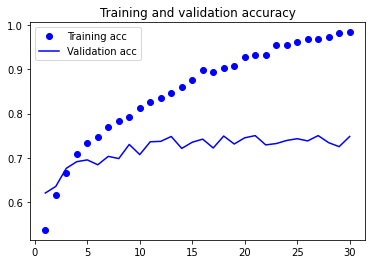

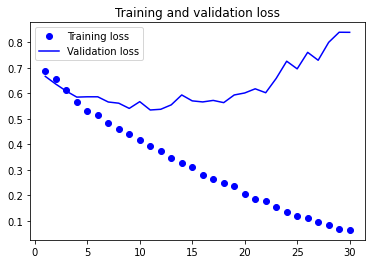

In [35]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 5.2.5 データ拡張
過学習は学習の対象となるサンプル数が少なすぎることで発生する。<br>
データ拡張は既存のデータサンプルからさらに訓練データを生成するというアプローチをとる。<br>
Kerasで実行するにはImageDataGeneratorクラスをインスタンス化するときにランダムな変換を設定する<br>
引数の説明<br>
https://keras.io/ja/preprocessing/image/<br>
<br>
featurewise_center: 真理値．データセット全体で，入力の平均を0にします．<br>
samplewise_center: 真理値．各サンプルの平均を0にします．<br>
featurewise_std_normalization: 真理値．入力をデータセットの標準偏差で正規化します．<br>
samplewise_std_normalization: 真理値．各入力をその標準偏差で正規化します．<br>
zca_epsilon: ZCA白色化のイプシロン．デフォルトは1e-6．<br>
zca_whitening: 真理値．ZCA白色化を適用します．<br>
rotation_range: 整数．画像をランダムに回転する回転範囲．<br>
width_shift_range: 浮動小数点数（横幅に対する割合）．ランダムに水平シフトする範囲．<br>
height_shift_range: 浮動小数点数（縦幅に対する割合）．ランダムに垂直シフトする範囲．<br>
shear_range: 浮動小数点数．シアー強度（反時計回りのシアー角度）．<br>
zoom_range: 浮動小数点数または[lower，upper]．ランダムにズームする範囲．浮動小数点数が与えられた場合，[lower, upper] = [1-zoom_range, 1+zoom_range]です．<br>
channel_shift_range: 浮動小数点数．ランダムにチャンネルをシフトする範囲．<br>
fill_mode: {"constant", "nearest", "reflect", "wrap"}のいずれか．デフォルトは 'nearest'です．指定されたモードに応じて，入力画像の境界周りを埋めます．<br>
    "constant": kkkkkkkk|abcd|kkkkkkkk (cval=k)<br>
    "nearest": aaaaaaaa|abcd|dddddddd<br>
    "reflect": abcddcba|abcd|dcbaabcd<br>
    "wrap": abcdabcd|abcd|abcdabcd<br>
cval: 浮動小数点数または整数．fill_mode = "constant"のときに境界周辺で利用される値．<br>
horizontal_flip: 真理値．水平方向に入力をランダムに反転します．<br>
vertical_flip: 真理値．垂直方向に入力をランダムに反転します．<br>
rescale: 画素値のリスケーリング係数．デフォルトはNone．Noneか0ならば，適用しない．それ以外であれば，(他の変換を行う前に) 与えられた値をデータに積算する．<br>
preprocessing_function: 各入力に適用される関数です．この関数は他の変更が行われる前に実行されます．この関数は3次元のNumpyテンソルを引数にとり，同じshapeのテンソルを出力するように定義する必要があります．<br>
data_format: {"channels_first", "channels_last"}のどちらか．"channels_last"の場合，入力のshapeは(samples, height, width, channels)となり，"channels_first"の場合は(samples, channels, height, width)となります．デフォルトはKerasの設定ファイル~/.keras/keras.jsonのimage_data_formatの値です．一度も値を変更していなければ，"channels_last"になります．<br>
validation_split: 浮動小数点数．検証のために予約しておく画像の割合（厳密には0から1の間）です．<br>

In [36]:
datagen2 = ImageDataGenerator(rotation_range = 40,
                            width_shift_range =0.2,
                            height_shift_range =0.2,
                            shear_range =0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            fill_mode = 'nearest')

In [37]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname)
         for fname in os.listdir(train_cats_dir)]

水増しされた訓練画像の表示

(150, 150, 3)
(1, 150, 150, 3)


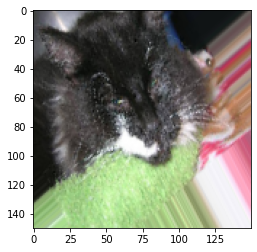

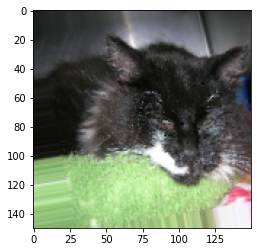

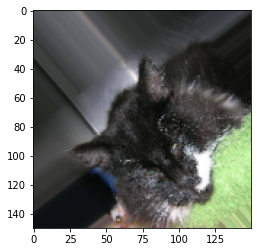

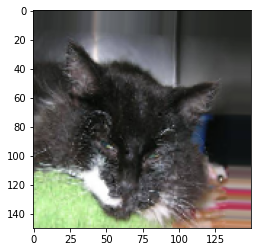

In [38]:
#画像処理ユーティリティのモジュール
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname)
         for fname in os.listdir(train_cats_dir)]


#水増しする画像を選択
img_path = fnames[3]

#画像を読み込み、サイズを変換
img = image.load_img(img_path, target_size = (150, 150))

#形状が(1, 150, 150, 3)のNumpy配列に変換
x = image.img_to_array(img) #この時点では shapeは(150, 150, 3)
print(x.shape)

#(1, 150, 150, 3)に変形
x = x.reshape((1,) + x.shape)
print(x.shape)

#ランダムに変換した画像パッチを生成する
#無限ループとなるため、何らかのタイミングでbreakする必要がある
i = 0
for batch in datagen2.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [39]:
x.shape

(1, 150, 150, 3)

Drop Outが追加された新しいCNNを定義

In [40]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [41]:
model2.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

データ拡張ジェネレータを使ってCNNを訓練

In [42]:
train_datagen2 = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest')

検証データは水増しすべきではないことに注意

In [43]:
train_generator2 = train_datagen2.flow_from_directory(
    train_dir,#ターゲットディレクトリ
    target_size = (150, 150),#全ての画像を150x150に変更
    batch_size = 20,#バッチサイズ
    class_mode = 'binary')#損失関数としてbinary_crossentropyを仕様するため2値ラベルが必要

Found 2000 images belonging to 2 classes.


In [44]:
test_datagen2 = ImageDataGenerator(rescale = 1./255)

In [45]:
validation_generator2 = test_datagen2.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [46]:
history2 = model2.fit_generator(
    train_generator2,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator2,
    validation_steps = 50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 21s 205ms/step - loss: 0.6973 - acc: 0.4864 - val_loss: 0.6817 - val_acc: 0.5650
Epoch 2/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6841 - acc: 0.5531 - val_loss: 0.6647 - val_acc: 0.5640
Epoch 3/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6701 - acc: 0.5778 - val_loss: 0.6725 - val_acc: 0.5640
Epoch 4/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6577 - acc: 0.5988 - val_loss: 0.6816 - val_acc: 0.5410
Epoch 5/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6487 - acc: 0.6074 - val_loss: 0.6115 - val_acc: 0.6420
Epoch 6/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6231 - acc: 0.6545 - val_loss: 0.5972 - val_acc: 0.6810
Epoch 7/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6148 - acc: 0.6677 - val_loss: 0.5938 - val_acc: 0.6670
Epoch 8/100
100/100 [===========================

In [47]:
model2.save('cats_and_dogs_small_2.h5')

In [48]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

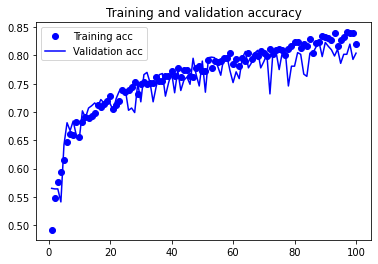

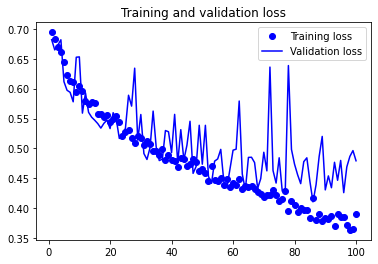

In [49]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5.3 学習済のCNNを使用する
ここではVGG16を使用する

## 5.3.1 特徴抽出
畳み込みニューラルネットワークの畳み込み層は、モデルの畳込みベース(convolutional base)と呼ばれる<br>
weightsはこのモデルを初期化するための重みのチェックポイント<br>
include_topはネットワークの出力側にある全結合分類器を含めるかどうか<br>
デフォルトではこの分類器はImageNetの1000クラス分類用になっている<br>
今回はcatとdogの２つだけを使用するので、分類器を含めない<br>
input_shapeはネットワークに供給するテンソル画像の形状<br>


In [50]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [52]:
#conv_base.trainable = True

#set_trainable = False
#for layer in conv_base.layers:
#    if layer.name == 'block5_conv1':
#        set_trainable = True
#    if set_trainable:
#       layer.trainable = True
#    else:
#        layer.trainable = False

In [53]:
#model.compile(loss='binary_crossentropy',
#              optimizer=optimizers.RMSprop(lr=1e-5),
#              metrics=['acc'])
#
#history = model.fit_generator(
#      train_generator,
#      steps_per_epoch=100,
#      epochs=100,
#      validation_data=validation_generator,
#      validation_steps=50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 13s 127ms/step - loss: 0.0330 - acc: 0.9929 - val_loss: 0.8319 - val_acc: 0.7450
Epoch 2/100
100/100 [==============================] - 12s 125ms/step - loss: 0.0244 - acc: 0.9993 - val_loss: 0.8467 - val_acc: 0.7460
Epoch 3/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.8556 - val_acc: 0.7510
Epoch 4/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0172 - acc: 1.0000 - val_loss: 0.8696 - val_acc: 0.7450
Epoch 5/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.8871 - val_acc: 0.7460
Epoch 6/100
100/100 [==============================] - 12s 123ms/step - loss: 0.0159 - acc: 1.0000 - val_loss: 0.8880 - val_acc: 0.7470
Epoch 7/100
100/100 [==============================] - 12s 122ms/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.9074 - val_acc: 0.7450
Epoch 8/100
100/100 [==============================] - 12s 1

最終的な特徴マップの形状は(4, 4, 512)<br>
これが全結合分類器が学習る特徴量<br>
ここから先に進む方法は以下の２つ<br>
1) 新しいデータセットで畳み込みベースを実行し、その出力をディスク上のNumPy配列に書き込み、このデータをスタンドアロンの全結合分類器の入力として使用する<br>
2) 最後にDense層を追加することでモデル(conv_base)を拡張子、最初から最後まですべての処理を入力データで実行<br>


### データ拡張を行わない高速な特徴抽出

In [54]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
base_dir = '/content/drive/MyDrive/GoogleColaboratory/Python_Keras_DeepLearning/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [56]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        #print(labels)
        if i * batch_size >= sample_count:
            #ジェネレーターはデータを無限ループで生成するため、画像を一通り処理したらbreakする必要がある
            break
            
    return features, labels                 

In [57]:
train_features, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.


In [58]:
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 1000 images belonging to 2 classes.


In [59]:
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.


In [60]:
train_features = np.reshape(train_features, (2000, 4 * 4* 512))

In [61]:
validation_features = np.reshape(validation_features, (1000, 4 * 4* 512))

In [62]:
test_features = np.reshape(test_features, (1000, 4 * 4* 512))

新しい全結合分類機を定義しデータとラベルを使って訓練する。正則化としてドロップアウトを使用する。

In [63]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])


In [65]:
history3 = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6469 - acc: 0.6373 - val_loss: 0.4605 - val_acc: 0.8290
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4663 - acc: 0.7802 - val_loss: 0.3777 - val_acc: 0.8420
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3835 - acc: 0.8379 - val_loss: 0.3329 - val_acc: 0.8650
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3307 - acc: 0.8706 - val_loss: 0.3077 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2870 - acc: 0.8941 - val_loss: 0.2982 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2792 - acc: 0.8971 - val_loss: 0.2756 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2453 - acc: 0.9140 - val_loss: 0.2672 - val_acc: 0.8950
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

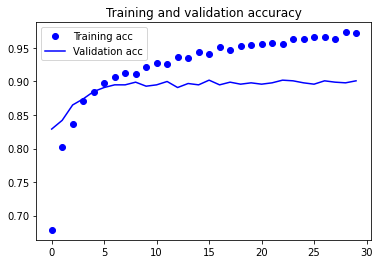

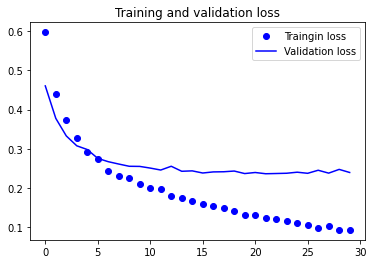

In [71]:
import matplotlib.pyplot as plt

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Traingin loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

データ拡張を伴う特徴抽出

In [74]:
from tensorflow.keras import models
from tensorflow.keras import layers

model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation = 'relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


VGGの凍結(freezing)を行う

In [76]:
print('This is the number of trainable weights '
'bofore freezing the conv base:', len(model3.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weithgs'
'after freezing the conv base:', len(model3.trainable_weights))

This is the number of trainable weights bofore freezing the conv base: 10
This is the number of trainable weithgsafter freezing the conv base: 4


Freezingしたあとはcompileが必要です。